# Insight into the "SOC (%)"

In [1]:
# 2410_iPAGE_SoilData_cleaned

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('2410_iPAGE_SoilData_cleaned.csv')
df.head()

Area  Data Collection Year soil group   Land class knit (surface)  \
0  Mithpukur                  2005      belab  high ground     Clay loam    
1  Mithpukur                  2005      belab  high ground     Clay loam    
2  Mithpukur                  2005      belab  high ground     Clay loam    
3  Mithpukur                  2005      belab  high ground     Clay loam    
4  Mithpukur                  2005      belab  high ground     Clay loam    

    pH  SOC (%)  Nitrogen N (%)  Potassium K (meq/100)  Phosphorus P (ug/g)  \
0  5.0     1.27            0.08                   0.15                 19.6   
1  4.9     1.47            0.09                   0.25                  4.1   
2  4.6     1.07            0.05                   0.09                 13.3   
3  5.2     1.51            0.06                   0.30                 20.2   
4  5.3     1.08            0.11                   0.17                 20.5   

   Sulfur S (ug/g)  Boron B (ug/g)  Zinc Zn (ug/g)  
0             37.7            0.26            0.86  
1             32.0            0.25            0.75  
2             13.5            0.27            0.95  
3             30.0            0.28            1.00  
4             27.8            0.30            1.04

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   Data Collection Year   618 non-null    int64  
 2   soil group             618 non-null    object 
 3   Land class             618 non-null    object 
 4   knit (surface)         461 non-null    object 
 5   pH                     618 non-null    float64
 6   SOC (%)                618 non-null    float64
 7   Nitrogen N (%)         618 non-null    float64
 8   Potassium K (meq/100)  618 non-null    float64
 9   Phosphorus P (ug/g)    618 non-null    float64
 10  Sulfur S (ug/g)        618 non-null    float64
 11  Boron B (ug/g)         618 non-null    float64
 12  Zinc Zn (ug/g)         618 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 62.9+ KB


In [5]:
df.shape

(618, 13)

In [6]:
df.select_dtypes(include=['object']).columns

Index(['Area', 'soil group', 'Land class', 'knit (surface)'], dtype='object')

In [7]:
df.select_dtypes(include=['float64']).columns

Index(['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)',
       'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)',
       'Zinc Zn (ug/g)'],
      dtype='object')

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Area                       0
Data Collection Year       0
soil group                 0
Land class                 0
knit (surface)           157
pH                         0
SOC (%)                    0
Nitrogen N (%)             0
Potassium K (meq/100)      0
Phosphorus P (ug/g)        0
Sulfur S (ug/g)            0
Boron B (ug/g)             0
Zinc Zn (ug/g)             0
dtype: int64

In [9]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())

0


In [10]:
# Value counts for each categorical feature: 

for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(df[column].nunique())
    print()
    print("="*45)

Value counts for Area:
Area
Mithpukur         213
Pirgacha          149
Kaunia upazila     99
Taraganj Thana     97
Gangachara         60
Name: count, dtype: int64
5

Value counts for soil group:
soil group
Gangachara                 238
Palashbari                  66
Kaunia                      63
Alluvial soil of Teesta     39
Pirgacha                    36
Berries                     32
belab                       20
the moon                    18
Sahapur                     16
Noadda                      15
Teesta sandy soil           11
Imadpur                     11
Berries                     10
Saghata                      8
recession                    8
Kachna                       6
Khilgaon                     5
Bhimpur                      5
The militants                4
Chilmari                     2
Menanagar                    2
the pen                      1
Imadpur                      1
Indrail                      1
Name: count, dtype: int64
24

Value counts for La

In [11]:
print(df["Data Collection Year"].value_counts())
print(df["Data Collection Year"].nunique())

Data Collection Year
2005    362
2016     99
1997     97
1990     60
Name: count, dtype: int64
4


# Summary Statistics

In [12]:
df.describe().T

count         mean        std      min        25%  \
Data Collection Year   618.0  2004.050162   7.103021  1990.00  1997.0000   
pH                     618.0     5.236942   0.469949     4.10     4.9000   
SOC (%)                618.0     1.792214   1.034159     0.10     1.3525   
Nitrogen N (%)         618.0     0.111832   0.507259     0.00     0.0700   
Potassium K (meq/100)  618.0     0.241246   0.581693     0.00     0.1100   
Phosphorus P (ug/g)    618.0    31.144256  38.078580     0.00     8.7850   
Sulfur S (ug/g)        618.0    15.340676  11.062096     0.40     8.7025   
Boron B (ug/g)         618.0     0.348997   0.258153     0.00     0.2300   
Zinc Zn (ug/g)         618.0     1.039191   0.976144     0.08     0.5200   

                           50%        75%      max  
Data Collection Year   2005.00  2005.0000  2016.00  
pH                        5.20     5.4000     7.80  
SOC (%)                   1.70     2.1600    20.40  
Nitrogen N (%)            0.09     0.1100    12.60  
Potassium K (meq/100)     0.17     0.2875    14.20  
Phosphorus P (ug/g)      16.00    37.7000   254.70  
Sulfur S (ug/g)          12.60    19.0000    85.00  
Boron B (ug/g)            0.30     0.4000     2.66  
Zinc Zn (ug/g)            0.82     1.1000    10.58

# Outlier Detection

In [13]:
# Detecting outliers using IQR (Interquartile Range)
numeric_data = df.select_dtypes(include=['number'])

# Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print(outliers)

Data Collection Year      0
pH                       25
SOC (%)                  20
Nitrogen N (%)           88
Potassium K (meq/100)    23
Phosphorus P (ug/g)      57
Sulfur S (ug/g)          42
Boron B (ug/g)           36
Zinc Zn (ug/g)           56
dtype: int64


# Univariate Analysis - Histogram

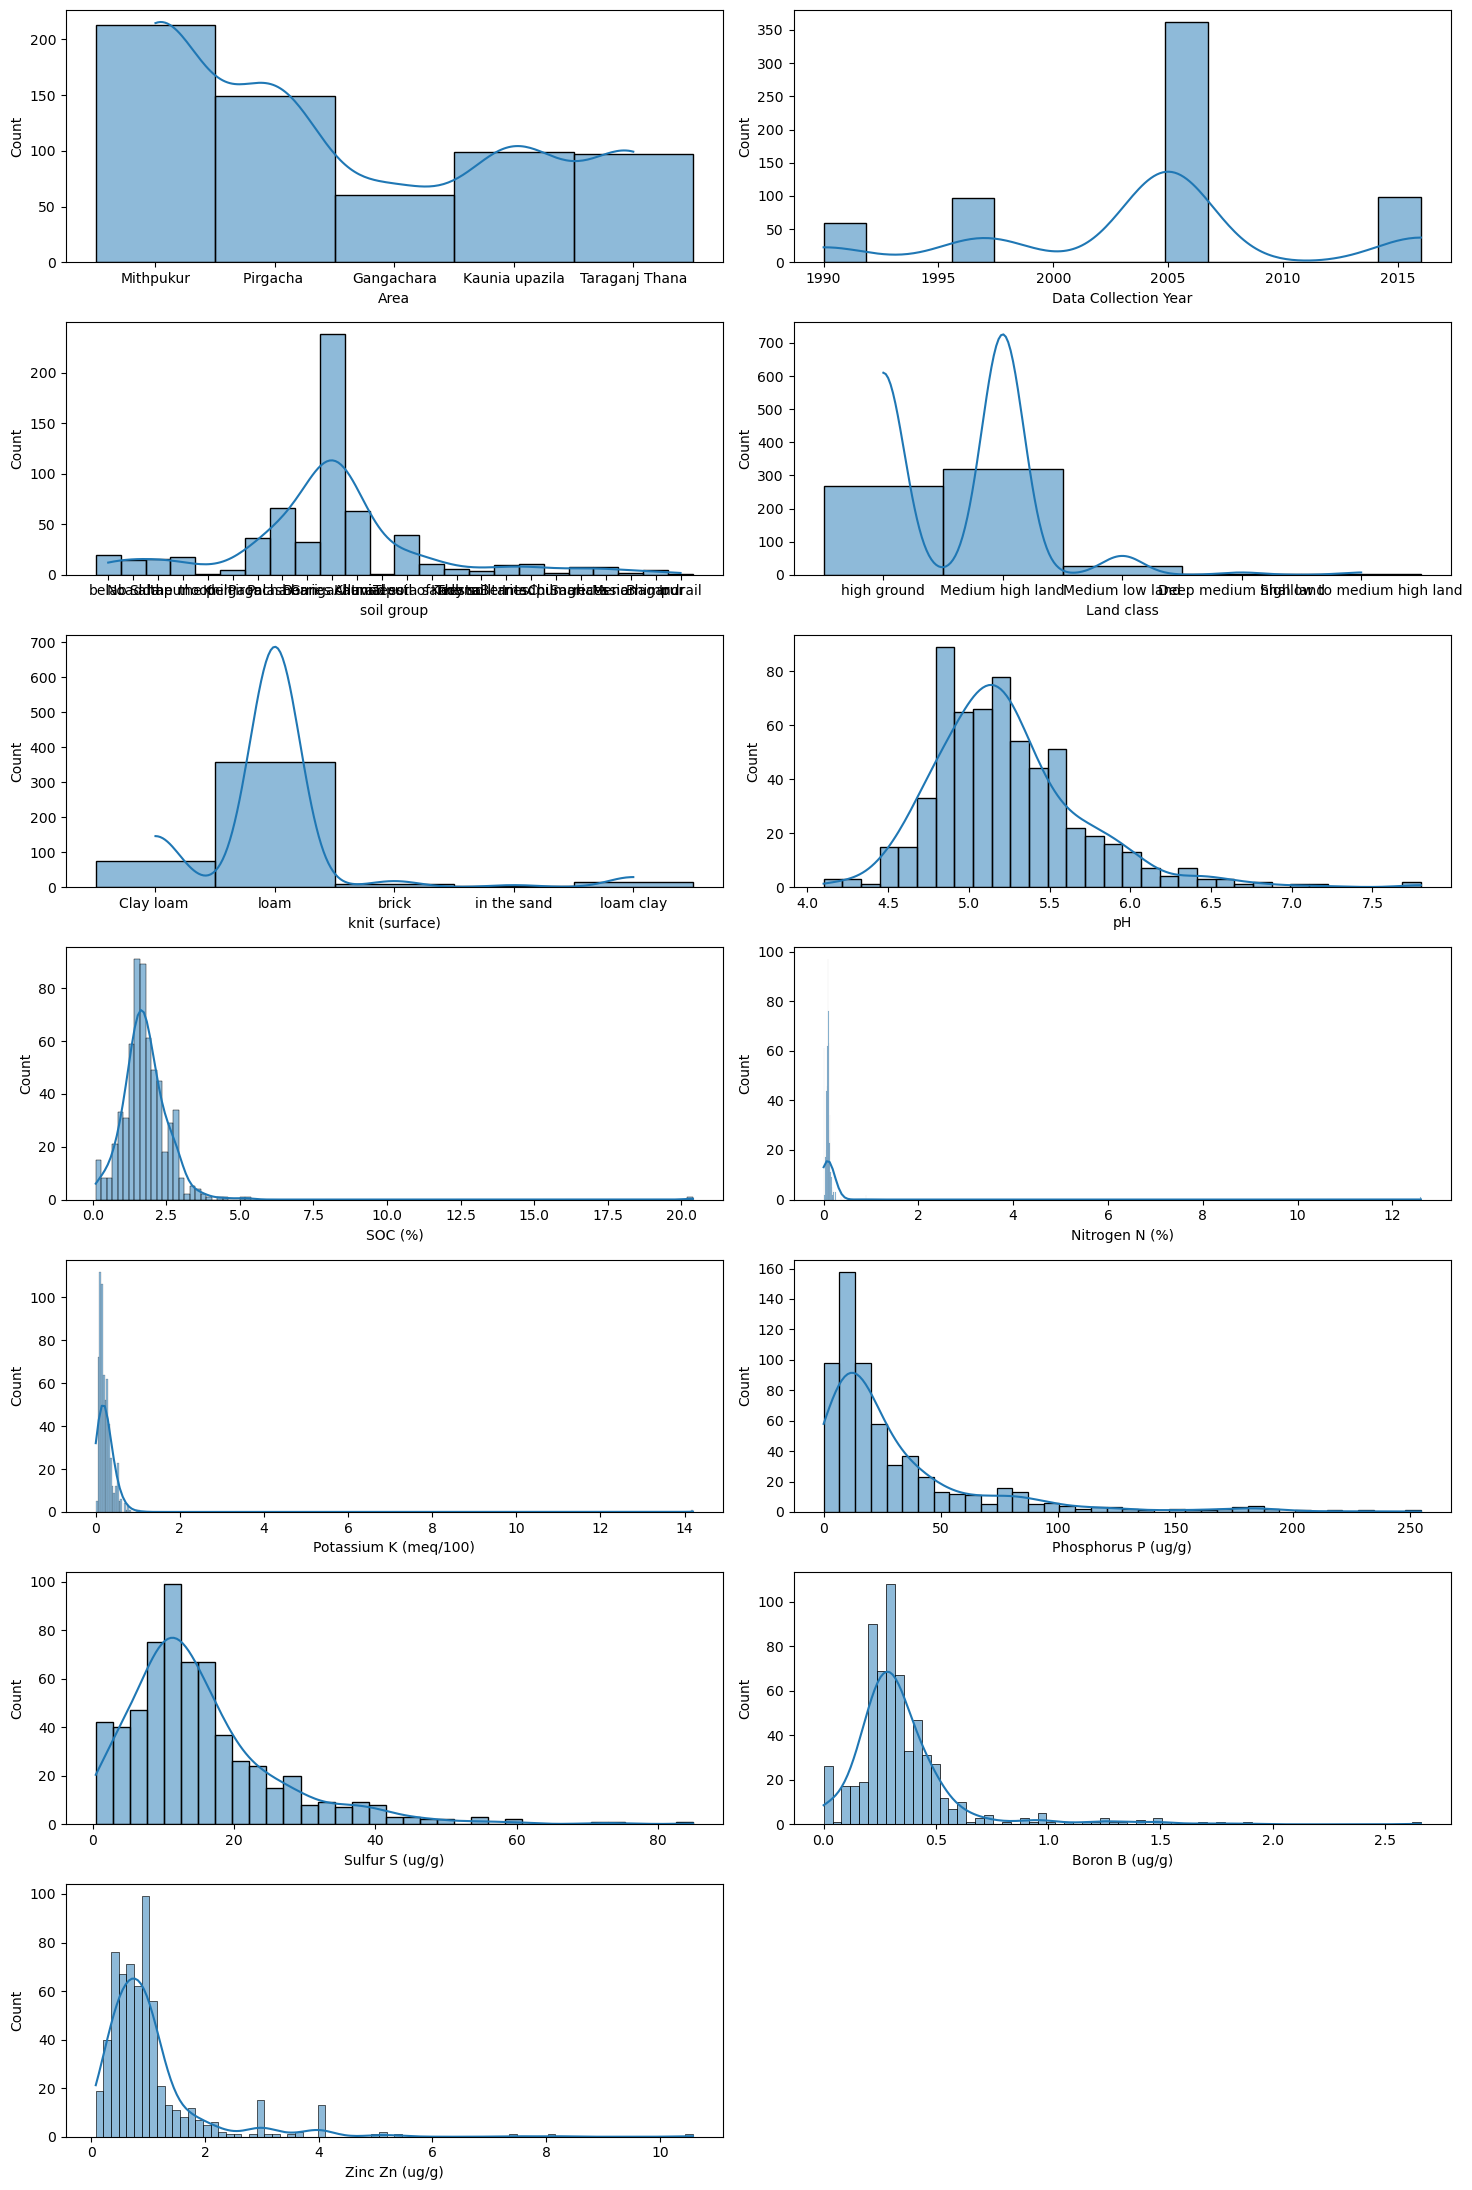

In [14]:
# Histogram Plots

num_rows = 7
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,22))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create histograms
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_xlabel(col)

# Hide any unused subplots
for i in range(len(df.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
# Calculate skewness for all numerical columns
skewness = df.select_dtypes(include=['number']).skew()

# Display the skewness values
print(skewness)

Data Collection Year     -0.141388
pH                        1.245709
SOC (%)                   9.632945
Nitrogen N (%)           24.273522
Potassium K (meq/100)    22.488278
Phosphorus P (ug/g)       2.620437
Sulfur S (ug/g)           1.905179
Boron B (ug/g)            3.437144
Zinc Zn (ug/g)            3.954932
dtype: float64


# Correlation Analysis

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')
df_corr= df_corr.applymap("{:.3f}".format)
df_corr

Data Collection Year      pH SOC (%) Nitrogen N (%)  \
Data Collection Year                 1.000  -0.140   0.198          0.038   
pH                                  -0.140   1.000  -0.241          0.038   
SOC (%)                              0.198  -0.241   1.000          0.023   
Nitrogen N (%)                       0.038   0.038   0.023          1.000   
Potassium K (meq/100)               -0.049   0.098  -0.050          0.952   
Phosphorus P (ug/g)                 -0.027  -0.087  -0.139         -0.050   
Sulfur S (ug/g)                     -0.125   0.158   0.059         -0.060   
Boron B (ug/g)                       0.257   0.092   0.072          0.012   
Zinc Zn (ug/g)                      -0.006   0.129  -0.015         -0.053   

                      Potassium K (meq/100) Phosphorus P (ug/g)  \
Data Collection Year                 -0.049              -0.027   
pH                                    0.098              -0.087   
SOC (%)                              -0.050              -0.139   
Nitrogen N (%)                        0.952              -0.050   
Potassium K (meq/100)                 1.000               0.054   
Phosphorus P (ug/g)                   0.054               1.000   
Sulfur S (ug/g)                       0.026               0.107   
Boron B (ug/g)                        0.033               0.160   
Zinc Zn (ug/g)                        0.089               0.332   

                      Sulfur S (ug/g) Boron B (ug/g) Zinc Zn (ug/g)  
Data Collection Year           -0.125          0.257         -0.006  
pH                              0.158          0.092          0.129  
SOC (%)                         0.059          0.072         -0.015  
Nitrogen N (%)                 -0.060          0.012         -0.053  
Potassium K (meq/100)           0.026          0.033          0.089  
Phosphorus P (ug/g)             0.107          0.160          0.332  
Sulfur S (ug/g)                 1.000          0.245          0.262  
Boron B (ug/g)                  0.245          1.000          0.169  
Zinc Zn (ug/g)                  0.262          0.169          1.000

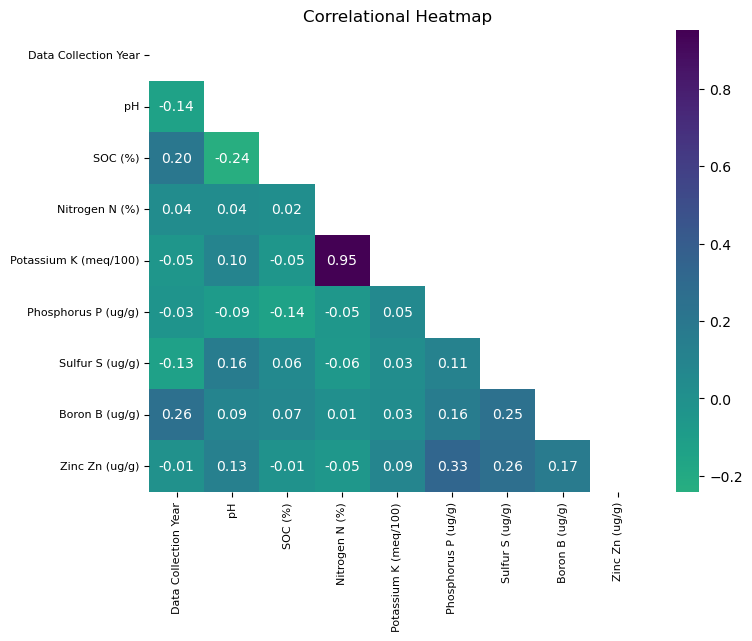

In [17]:
# Correlation Matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', center=0, mask=mask, fmt=".2f")
plt.xticks(rotation = 90, fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlational Heatmap')
plt.show()

In [18]:
# Strongest Positive Correlated Features

numeric_df = df.select_dtypes(include=[np.number])
df_corr = numeric_df.corr(method='pearson')

# Threshold for high correlation
threshold = 0.50

# Extract the pairs of features with correlation values greater than the threshold
corr_pairs = df_corr.unstack()
high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]

# Drop duplicate pairs by sorting the index and dropping duplicates
high_corr = high_corr.reset_index()
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = high_corr.drop_duplicates(subset=['Correlation'])

# Sort by correlation value in descending order
high_corr = high_corr.sort_values(by='Correlation', ascending=False)

# Display the pairs
high_corr

Feature1               Feature2  Correlation
0  Nitrogen N (%)  Potassium K (meq/100)     0.951968

In [19]:
# Strongest Negative Correlated Features

# Set the threshold for the negative correlation value
threshold = -0.5

# Extract the pairs of features with correlation values between -1 and the threshold
neg_corr_pairs = df_corr.unstack()
high_neg_corr = neg_corr_pairs[(neg_corr_pairs < threshold) & (neg_corr_pairs > -1)]

# Drop duplicate pairs by sorting the index and dropping duplicates
high_neg_corr = high_neg_corr.reset_index()
high_neg_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_neg_corr = high_neg_corr.drop_duplicates(subset=['Correlation'])

# Filter out self-correlations
high_neg_corr = high_neg_corr[high_neg_corr['Feature1'] != high_neg_corr['Feature2']]

# Sort by correlation value in ascending order 
high_neg_corr = high_neg_corr.sort_values(by='Correlation')

# Display the pairs
high_neg_corr

Empty DataFrame
Columns: [Feature1, Feature2, Correlation]
Index: []

In [20]:
df_corr["SOC (%)"].sort_values(ascending=False)

SOC (%)                  1.000000
Data Collection Year     0.197989
Boron B (ug/g)           0.071694
Sulfur S (ug/g)          0.058506
Nitrogen N (%)           0.022636
Zinc Zn (ug/g)          -0.014694
Potassium K (meq/100)   -0.049869
Phosphorus P (ug/g)     -0.139034
pH                      -0.240970
Name: SOC (%), dtype: float64

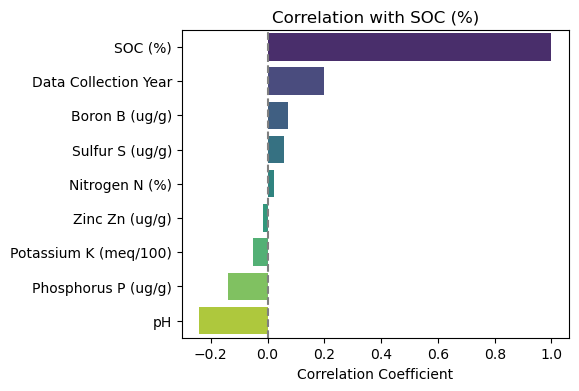

In [21]:
# sorted_corr values are numeric
sorted_corr = df_corr["SOC (%)"].sort_values(ascending=False).astype(float)

# Create a bar plot
plt.figure(figsize=(5,4))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")

plt.title('Correlation with SOC (%)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('')

plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

In [22]:
df.select_dtypes(include=['float64']).columns

Index(['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)',
       'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)',
       'Zinc Zn (ug/g)'],
      dtype='object')

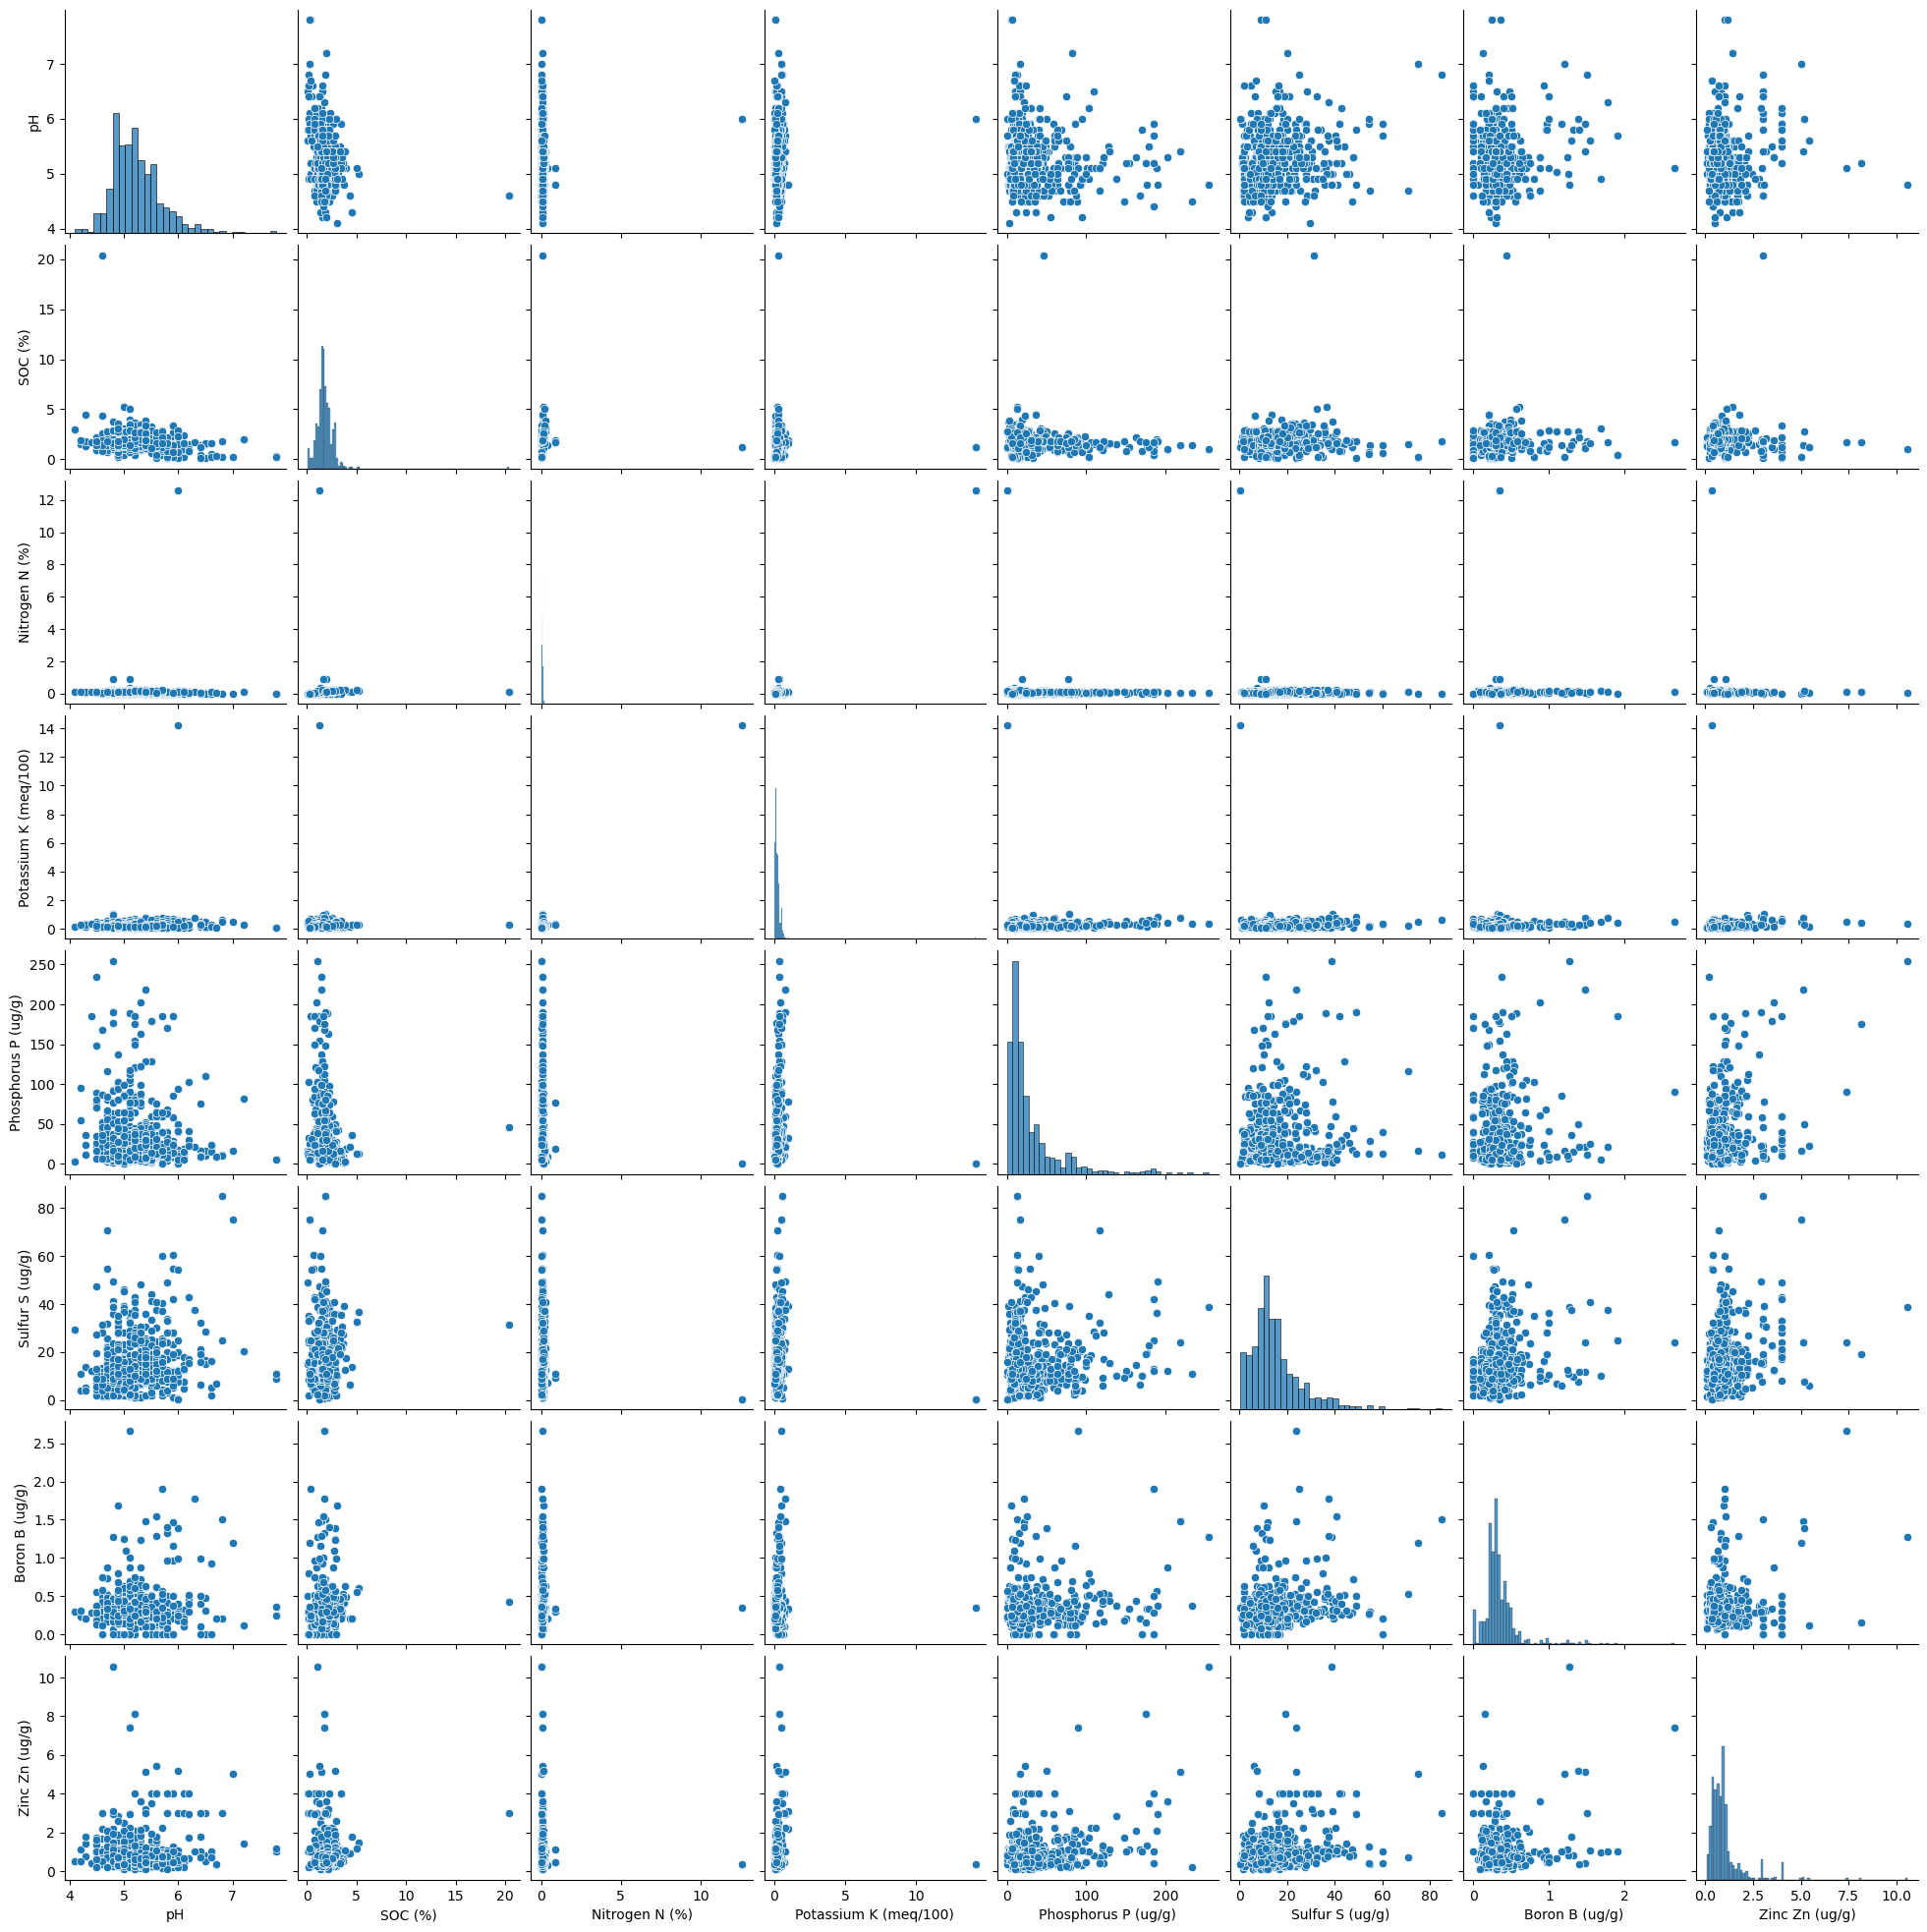

In [23]:
# Create a pairplot - Numerical Variables:

sns.pairplot(df[['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)',
                 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)',
                'Zinc Zn (ug/g)']])

plt.show()

# Insight into "SOC (%)"

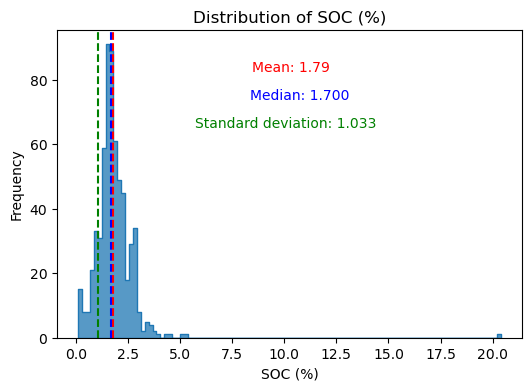

In [24]:
# Histogram:

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='SOC (%)', element='step', common_norm=False)


mean = np.mean(df['SOC (%)'])
median = np.median(df['SOC (%)'])
std_deviation = np.std(df['SOC (%)'])

plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='blue', linestyle='--')
plt.axvline(x=std_deviation, color='green', linestyle='--')

# annotate mean,median & Standard deviation
plt.annotate(f'Mean: {mean:.3}', xy=(mean, plt.gca().get_ylim()[1]), xytext=(100, -30),
             textcoords='offset points', color='red', fontsize=10)
plt.annotate(f'Median: {median:.3f}', xy=(median, plt.gca().get_ylim()[1]), xytext=(100, -50),
             textcoords='offset points', color='blue', fontsize=10)
plt.annotate(f'Standard deviation: {std_deviation:.3f}', xy=(std_deviation, plt.gca().get_ylim()[1]), xytext=(70, -70),
           textcoords='offset points', color='green', fontsize=10)
plt.xlabel('SOC (%)')
plt.ylabel('Frequency')
plt.title('Distribution of SOC (%)')
plt.show()


In [25]:
df["SOC (%)"].describe()

count    618.000000
mean       1.792214
std        1.034159
min        0.100000
25%        1.352500
50%        1.700000
75%        2.160000
max       20.400000
Name: SOC (%), dtype: float64

In [26]:
skewness = df["SOC (%)"].skew()
print(f"Skewness: {skewness}")

Skewness: 9.632944630840102


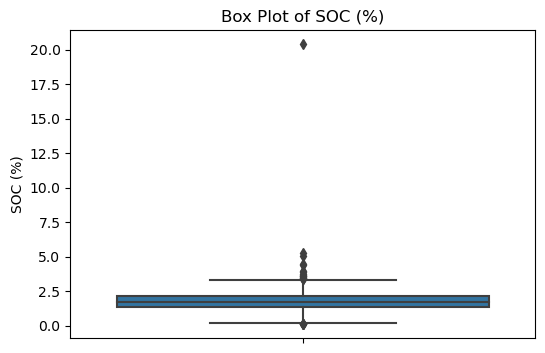

In [27]:
# Create a box plot 
plt.figure(figsize=(6, 4))
sns.boxplot(y='SOC (%)', data=df)
plt.ylabel('SOC (%)')
plt.title('Box Plot of SOC (%)')
plt.show()

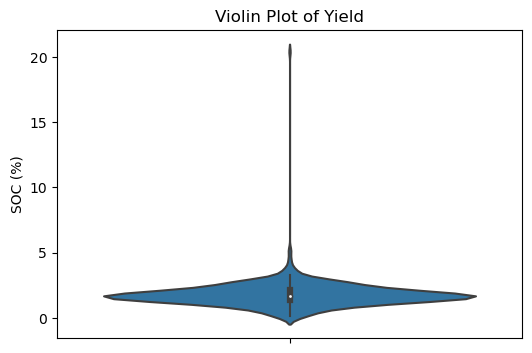

In [28]:
# Create a violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(y='SOC (%)', data=df)
plt.ylabel('SOC (%)')
plt.title('Violin Plot of Yield')
plt.show()

# Insight into 'SOC (%)' - KDE Plot

In [29]:
df.select_dtypes(include=['object']).columns

Index(['Area', 'soil group', 'Land class', 'knit (surface)'], dtype='object')

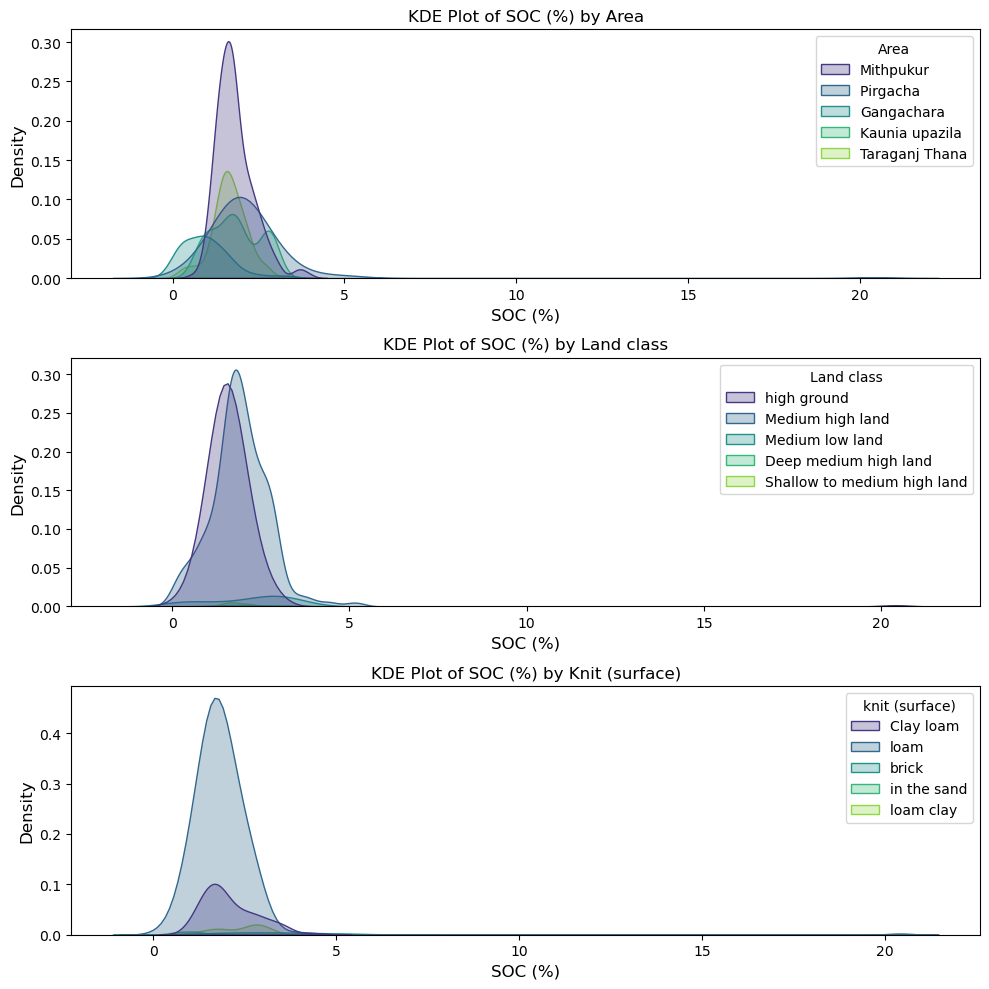

In [30]:
plt.figure(figsize=(10, 10))

# Define the list of hues
hues = ['Area', 'Land class', 'knit (surface)']

# Loop through each hue
for i, hue in enumerate(hues, 1):
    plt.subplot(len(hues), 1, i)
    sns.kdeplot(data=df, x="SOC (%)", alpha=0.3, shade=True, hue=hue, palette='viridis')
    plt.xlabel('SOC (%)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title(f'KDE Plot of SOC (%) by {hue.capitalize()}' , fontsize=12)

plt.tight_layout()
plt.show()

# Insight into Categorical Variables and "SOC %"

**"SOC (%)" and "Area"**

In [31]:
# Box Plot for "SOC (%)" and "Area":

custom_colors = px.colors.qualitative.Plotly[:len(df['Area'].unique())]

# Create the box plot using plotly with custom colors
fig = px.box(df, x='Area', y='SOC (%)', title='Box Plot for SOC (%) and Area',
             color='Area', color_discrete_sequence=custom_colors)

# Update layout to adjust the figure size
fig.update_layout(width=1000, height=600)

fig.show()

In [32]:
# Average "SOC (%)" for "Area"

# Group data by "Area" and calculate the Average "SOC (%)":
average_SOC = df.groupby("Area")["SOC (%)"].mean().reset_index()

# Sort the data by "SOC (%)" in descending order
average_SOC = average_SOC.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart 
fig = px.bar(average_SOC, x="Area", y="SOC (%)",
             labels={"Area": "Area", "SOC (%)": "SOC (%)"},
             title="Average SOC (%) for each Area",
             color="Area",  
             color_discrete_sequence=px.colors.sequential.Viridis)  

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if needed
# fig.update_xaxes(tickangle=90)

fig.show()

In [33]:
average_SOC

Area   SOC (%)
3       Pirgacha   2.168054
1  Kaunia upazila  1.842222
2       Mithpukur  1.799239
4  Taraganj Thana  1.654021
0      Gangachara  0.974833

* Highest SOC (%): Pirgacha leads with the highest average SOC (%) at 2.17%, followed by Kaunia upazila (1.84%) and Mithpukur (1.80%).

* Lowest SOC (%): Gangachara shows the lowest average SOC (%) among the areas, at 0.97%.

* These differences in SOC (%) suggest that Pirgacha has potentially richer organic carbon content, while Gangachara may require soil improvement efforts for enhanced soil quality. 

In [34]:
# Percentage of "SOC (%)" for "Area"

# Group data by "Area" and calculate the total and percentage of "SOC (%)"
total_SOC = df["SOC (%)"].sum()

# Calculate the percentage for each Area
df_percentage = df.groupby("Area")["SOC (%)"].sum().reset_index()
df_percentage['SOC (%)'] = (df_percentage['SOC (%)'] / total_SOC) * 100

# Sort the data by "SOC (%)" percentage in descending order
df_percentage = df_percentage.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart using plotly
fig = px.bar(df_percentage, x="Area", y="SOC (%)", color="Area",
             labels={"Area": "Area", "SOC (%)": "Percentage of SOC (%)"},
             title="Percentage of SOC (%) for each Area",
             color_discrete_sequence=px.colors.sequential.Viridis)

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if necessary
# fig.update_xaxes(tickangle=90)

fig.show()

In [35]:
df_percentage 

Area    SOC (%)
2       Mithpukur  34.601133
3       Pirgacha   29.166080
1  Kaunia upazila  16.466412
4  Taraganj Thana  14.485531
0      Gangachara   5.280845

* Mithpukur contributes the most significant share of SOC (%) at 34.60% of the total, indicating this area’s high organic carbon content.
* Pirgacha follows closely with 29.17%, also suggesting substantial SOC presence.
* Kaunia upazila and Taraganj Thana make up 16.47% and 14.49%, respectively, reflecting moderate SOC contributions.
* Gangachara has the smallest share, with only 5.28% of the total SOC (%).

* In gheneral the findings show that Mithpukur and Pirgacha are areas with relatively high SOC presence both in terms of average value and total contribution, while Gangachara has the lowest.

**"SOC (%)" and "soil group"**

In [36]:
# Box Plot for "SOC (%)" and "soil group":

custom_colors = px.colors.qualitative.Plotly[:len(df['soil group'].unique())]

# Create the box plot using plotly with custom colors
fig = px.box(df, x='soil group', y='SOC (%)', title='Box Plot for SOC (%) and soil group',
             color='soil group', color_discrete_sequence=custom_colors)

# Update layout to adjust the figure size
fig.update_layout(width=1000, height=600)

fig.show()

In [37]:
# Average "SOC (%)" for "soil group"

# Group data by "soil group" and calculate the Average "SOC (%)":
average_SOC = df.groupby("soil group")["SOC (%)"].mean().reset_index()

# Sort the data by "SOC (%)" in descending order
average_SOC = average_SOC.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart 
fig = px.bar(average_SOC, x="soil group", y="SOC (%)",
             labels={"soil group": "soil group", "SOC (%)": "SOC (%)"},
             title="Average SOC (%) for each soil group",
             color="soil group",  
             color_discrete_sequence=px.colors.sequential.Viridis)  

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if needed
# fig.update_xaxes(tickangle=90)

fig.show()

In [38]:
average_SOC

soil group   SOC (%)
19            The militants  4.310000
7                  Imadpur   2.870000
8                   Indrail  2.790000
9                    Kachna  2.596667
10                   Kaunia  2.468889
11                 Khilgaon  2.456000
23                 the pen   2.380000
3                   Bhimpur  2.226000
6                   Imadpur  2.000909
17                  Sahapur  1.936250
4                  Chilmari  1.895000
5                Gangachara  1.882134
22                 the moon  1.843889
15                 Pirgacha  1.799167
13                   Noadda  1.719267
2                  Berries   1.614000
21                recession  1.577500
1                   Berries  1.507531
12                Menanagar  1.505000
14               Palashbari  1.491364
20                    belab  1.428000
16                 Saghata   1.195000
0   Alluvial soil of Teesta  0.991795
18        Teesta sandy soil  0.369091

* Top Soil Groups by Average SOC (%): "The militants" soil group has the highest average SOC, with 4.31%. This is followed by soil groups like "Imadpur" (2.87%), "Indrail" (2.79%), and "Kachna" (2.60%).

* Mid-range SOC (%) Groups: Soil groups such as "Kaunia," "Khilgaon," and "the pen" display moderate SOC levels, averaging around 2.38% to 2.46%.

* Lowest SOC (%) Groups: "Alluvial soil of Teesta" and "Teesta sandy soil" have the lowest SOC averages, at 0.99% and 0.37%, respectively.

In [39]:
# Percentage of "SOC (%)" for "soil group"

# Group data by "soil group" and calculate the total and percentage of "SOC (%)"
total_SOC = df["SOC (%)"].sum()

# Calculate the percentage for each soil group
df_percentage = df.groupby("soil group")["SOC (%)"].sum().reset_index()
df_percentage['SOC (%)'] = (df_percentage['SOC (%)'] / total_SOC) * 100

# Sort the data by "SOC (%)" percentage in descending order
df_percentage = df_percentage.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart using plotly
fig = px.bar(df_percentage, x="soil group", y="SOC (%)", color="soil group",
             labels={"soil group": "soil group", "SOC (%)": "Percentage of SOC (%)"},
             title="Percentage of SOC (%) for each soil group",
             color_discrete_sequence=px.colors.sequential.Viridis)

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if necessary
# fig.update_xaxes(tickangle=90)

fig.show()

In [40]:
df_percentage

soil group    SOC (%)
5                Gangachara  40.443558
10                   Kaunia  14.043128
14               Palashbari   8.886879
15                 Pirgacha   5.847842
1                   Berries   4.355500
0   Alluvial soil of Teesta   3.492273
22                 the moon   2.996602
17                  Sahapur   2.797069
20                    belab   2.578576
13                   Noadda   2.328393
6                   Imadpur   1.987201
19            The militants   1.556535
2                  Berries    1.457221
9                    Kachna   1.406660
21                recession   1.139413
11                 Khilgaon   1.108716
3                   Bhimpur   1.004886
16                 Saghata    0.863137
18        Teesta sandy soil   0.366562
4                  Chilmari   0.342185
12                Menanagar   0.271762
7                  Imadpur    0.259122
8                   Indrail   0.251899
23                 the pen    0.214881

* Top Contributors: "Gangachara" contributes the highest percentage of SOC (40.44%), followed by "Kaunia" (14.04%) and "Palashbari" (8.89%). Together, these three soil groups make up the majority of SOC in the dataset.

* Moderate Contributors: Soil groups such as "Pirgacha," "Berries," and "Alluvial soil of Teesta" contribute between 3-6%, showing moderate SOC shares.

* Lowest Contributors: Soil groups like "Teesta sandy soil," "Chilmari," "Menanagar," and others have minimal SOC contributions, under 1%.

* These percentage results partially align with the previous average SOC findings. Soil groups like "Gangachara" and "Kaunia" have both high average SOC values and large overall contributions. However, "The militants," which had the highest average SOC, contributes only 1.56% in terms of total SOC percentage, suggesting that while this group has high SOC on average, it is relatively limited in area

**"SOC (%)" and "Land class"**

In [41]:
# Box Plot for "SOC (%)" and "Land class":

custom_colors = px.colors.qualitative.Plotly[:len(df['Land class'].unique())]

# Create the box plot using plotly with custom colors
fig = px.box(df, x='Land class', y='SOC (%)', title='Box Plot for SOC (%) and Land class',
             color='Land class', color_discrete_sequence=custom_colors)

# Update layout to adjust the figure size
fig.update_layout(width=1000, height=600)

fig.show()

In [42]:
# Average "SOC (%)" for "Land class"

# Group data by "Land class" and calculate the Average "SOC (%)":
average_SOC = df.groupby("Land class")["SOC (%)"].mean().reset_index()

# Sort the data by "SOC (%)" in descending order
average_SOC = average_SOC.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart 
fig = px.bar(average_SOC, x="Land class", y="SOC (%)",
             labels={"Land class": "Land class", "SOC (%)": "SOC (%)"},
             title="Average SOC (%) for each Land class",
             color="Land class",  
             color_discrete_sequence=px.colors.sequential.Viridis)  

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if needed
# fig.update_xaxes(tickangle=90)

fig.show()

In [43]:
average_SOC

Land class   SOC (%)
0        Deep medium high land  2.333333
2              Medium low land  2.145200
1             Medium high land  1.890564
3  Shallow to medium high land  1.806667
4                  high ground  1.636000

* Highest SOC: "Deep medium high land" has the highest average SOC at 2.33%, indicating greater soil organic carbon content in this land class.

* Moderate SOC: "Medium low land" and "Medium high land" follow with average SOC values of 2.15% and 1.89%, respectively.

* Lower SOC: "Shallow to medium high land" and "High ground" have the lowest average SOC, at 1.81% and 1.64%, respectively.

In [44]:
# Percentage of "SOC (%)" for "Land class"

# Group data by "Land class" and calculate the total and percentage of "SOC (%)"
total_SOC = df["SOC (%)"].sum()

# Calculate the percentage for each Land class
df_percentage = df.groupby("Land class")["SOC (%)"].sum().reset_index()
df_percentage['SOC (%)'] = (df_percentage['SOC (%)'] / total_SOC) * 100

# Sort the data by "SOC (%)" percentage in descending order
df_percentage = df_percentage.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart using plotly
fig = px.bar(df_percentage, x="Land class", y="SOC (%)", color="Land class",
             labels={"Land class": "Land class", "SOC (%)": "Percentage of SOC (%)"},
             title="Percentage of SOC (%) for each Land class",
             color_discrete_sequence=px.colors.sequential.Viridis)

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if necessary
# fig.update_xaxes(tickangle=90)

fig.show()

In [45]:
df_percentage 

Land class    SOC (%)
1             Medium high land  54.450752
4                  high ground  39.585839
2              Medium low land   4.842053
0        Deep medium high land   0.632004
3  Shallow to medium high land   0.489352

* Dominance of "Medium high land" and "High ground": "Medium high land" accounts for 54.45% of the total SOC, followed closely by "High ground" at 39.59%. Together, these two land classes contain nearly all SOC in the dataset.

* Low SOC Contribution from Other Classes: "Medium low land," "Deep medium high land," and "Shallow to medium high land" contribute minimally, with percentages below 5%.

* This distribution contrasts with the previous average results, where "Deep medium high land" showed the highest average SOC (%), though its total SOC contribution remains small relative to other land classes.

* This indicates that while some classes may have high average SOC, they represent smaller portions of the land area, resulting in a lower overall SOC contribution.

**"SOC (%)" and "knit (surface)"**

In [46]:
# Box Plot for "SOC (%)" and "knit (surface)":

custom_colors = px.colors.qualitative.Plotly[:len(df['knit (surface)'].unique())]

# Create the box plot using plotly with custom colors
fig = px.box(df, x='knit (surface)', y='SOC (%)', title='Box Plot for SOC (%) and knit (surface)',
             color='knit (surface)', color_discrete_sequence=custom_colors)

# Update layout to adjust the figure size
fig.update_layout(width=1000, height=600)

fig.show()

In [47]:
# Average "SOC (%)" for "knit (surface)"

# Group data by "knit (surface)" and calculate the Average "SOC (%)":
average_SOC = df.groupby("knit (surface)")["SOC (%)"].mean().reset_index()

# Sort the data by "SOC (%)" in descending order
average_SOC = average_SOC.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart 
fig = px.bar(average_SOC, x="knit (surface)", y="SOC (%)",
             labels={"knit (surface)": "knit (surface)", "SOC (%)": "SOC (%)"},
             title="Average SOC (%) for each knit (surface)",
             color="knit (surface)",  
             color_discrete_sequence=px.colors.sequential.Viridis)  

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if needed
# fig.update_xaxes(tickangle=90)

fig.show()

In [48]:
average_SOC

knit (surface)   SOC (%)
1          brick  3.256667
4      loam clay  2.351333
0     Clay loam   2.085382
3           loam  1.851394
2    in the sand  0.930000

* Brick surfaces have the highest SOC, at approximately 3.26%, suggesting a high organic carbon content on these surfaces.
* Loam clay and Clay loam follow, with average SOC values of 2.35% and 2.08%, respectively,followd by Loam surfaces (1.85%) .
* In the sand surfaces have the lowest SOC at 0.93%, indicating low organic carbon content on sandy surfaces.

In [49]:
# Percentage of "SOC (%)" for "knit (surface)"

# Group data by "knit (surface)" and calculate the total and percentage of "SOC (%)"
total_SOC = df["SOC (%)"].sum()

# Calculate the percentage for each Land class
df_percentage = df.groupby("knit (surface)")["SOC (%)"].sum().reset_index()
df_percentage['SOC (%)'] = (df_percentage['SOC (%)'] / total_SOC) * 100

# Sort the data by "SOC (%)" percentage in descending order
df_percentage = df_percentage.sort_values(by="SOC (%)", ascending=False)

# Create the bar chart using plotly
fig = px.bar(df_percentage, x="knit (surface)", y="SOC (%)", color="knit (surface)",
             labels={"knit (surface)": "knit (surface)", "SOC (%)": "Percentage of SOC (%)"},
             title="Percentage of SOC (%) for each knit (surface)",
             color_discrete_sequence=px.colors.sequential.Viridis)

# Set font size for x and y axis labels
fig.update_xaxes(title_font_size=12, tickfont_size=12)
fig.update_yaxes(title_font_size=12, tickfont_size=12)

# Rotate x-axis labels if necessary
# fig.update_xaxes(tickangle=90)

fig.show()

In [50]:
df_percentage

knit (surface)    SOC (%)
3           loam  59.841656
0     Clay loam   14.309382
4      loam clay   3.184397
1          brick   2.646291
2    in the sand   0.251899

* Loam contributes the most, with nearly 59.84% of the total SOC across all surfaces, which strongly dominates the distribution.

* Clay loam has a smaller share, with 14.31% of the total SOC.

* Loam clay follows, accounting for about 3.18% of the total SOC.

* Brick surfaces contribute 2.65%, and in the sand has the lowest percentage at 0.25%

**How does the average SOC (%) vary by Land class within each area?**

In [51]:
# Average SOC (%) by Land class for each Area

for Area, group_data in df.groupby('Area'):
    avg_SOC = group_data.groupby('Land class')['SOC (%)'].mean().reset_index()

    fig = px.bar(avg_SOC, x='Land class', y='SOC (%)',
                 title=f'Average SOC % by Land class in {Area}',
                 labels={'SOC (%)': 'SOC (%)', 'Land class': 'Land class'},
                 color='SOC (%)',  
                 color_continuous_scale=px.colors.sequential.Viridis)  
    
    # Update the layout
    fig.update_layout(
        width=1000,
        height=500,
        legend_title_text=Area,
        xaxis_title='Land class',
        yaxis_title='Average SOC (%)')
    
    # Show the plot
    fig.show()

**Q: How does the average SOC (%) vary by soil group within each area?**

In [52]:
# Average SOC (%) by soil group for each Area

for Area, group_data in df.groupby('Area'):
    avg_SOC = group_data.groupby('soil group')['SOC (%)'].mean().reset_index()

    fig = px.bar(avg_SOC, x='soil group', y='SOC (%)',
                 title=f'Average SOC % by soil group in {Area}',
                 labels={'SOC (%)': 'SOC (%)', 'soil group': 'soil group'},
                 color='SOC (%)',  
                 color_continuous_scale=px.colors.sequential.Viridis)  
    
    # Update the layout
    fig.update_layout(
        width=1000,
        height=500,
        legend_title_text=Area,
        xaxis_title='soil group',
        yaxis_title='Average SOC (%)')
    
    # Show the plot
    fig.show()

# Numerical Variables and "SOC (%)" - Scatter Plot

In [53]:
df.select_dtypes(include=['float64']).columns

Index(['pH', 'SOC (%)', 'Nitrogen N (%)', 'Potassium K (meq/100)',
       'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)',
       'Zinc Zn (ug/g)'],
      dtype='object')

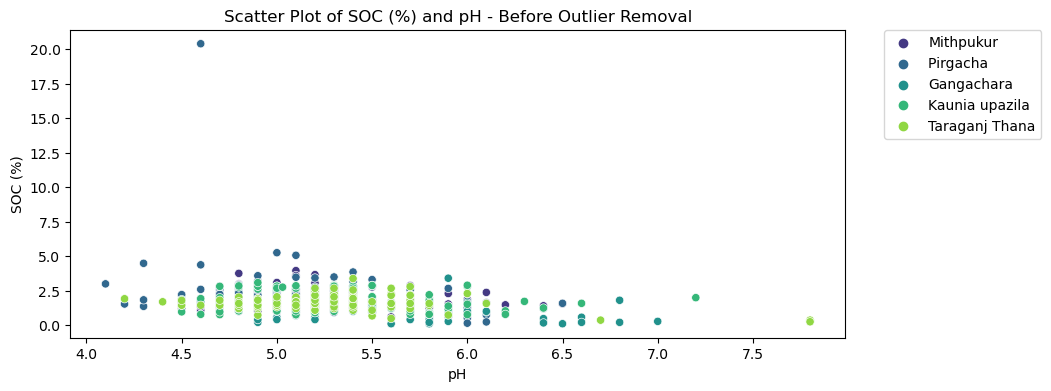

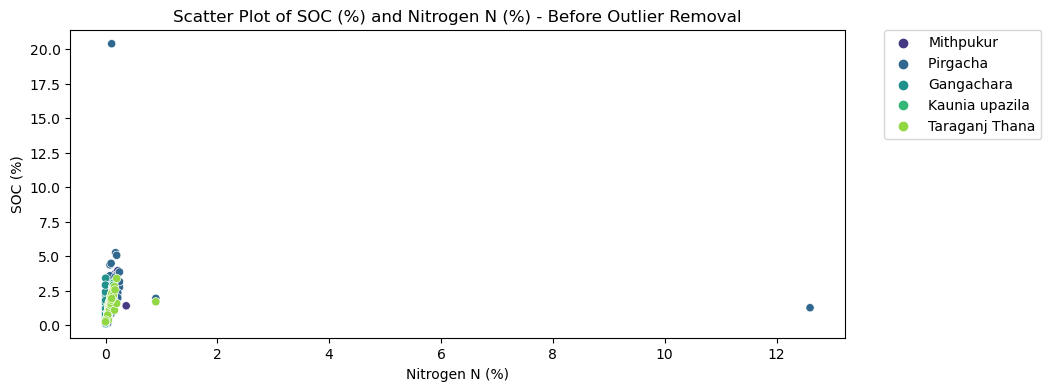

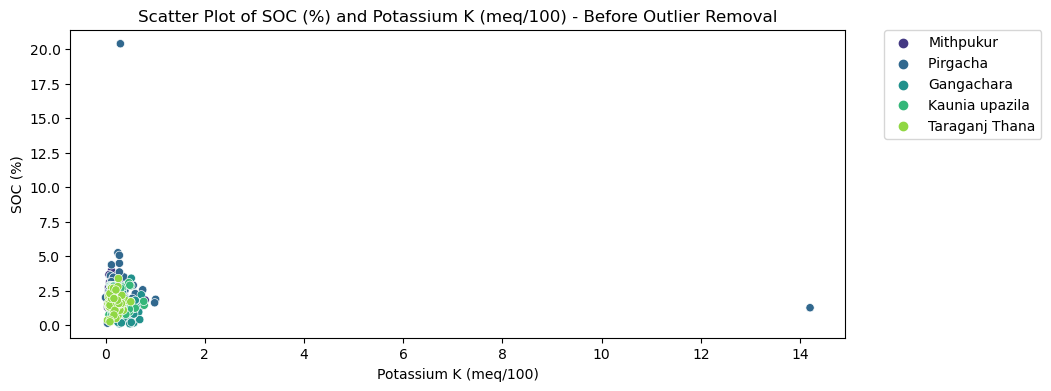

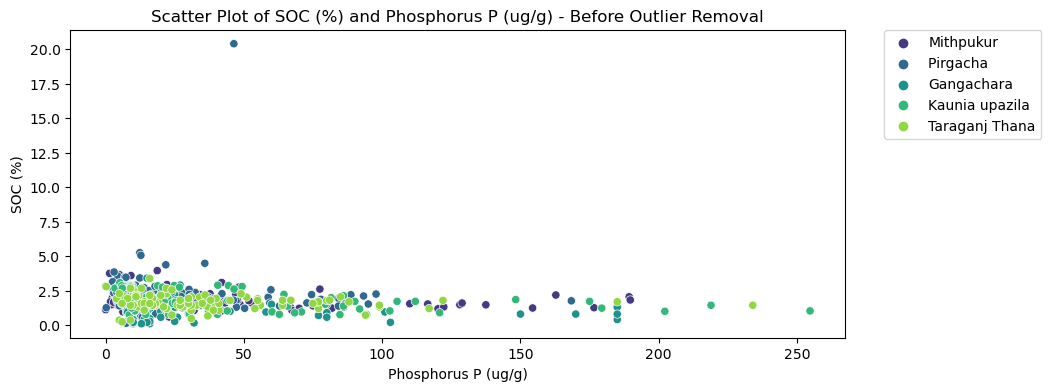

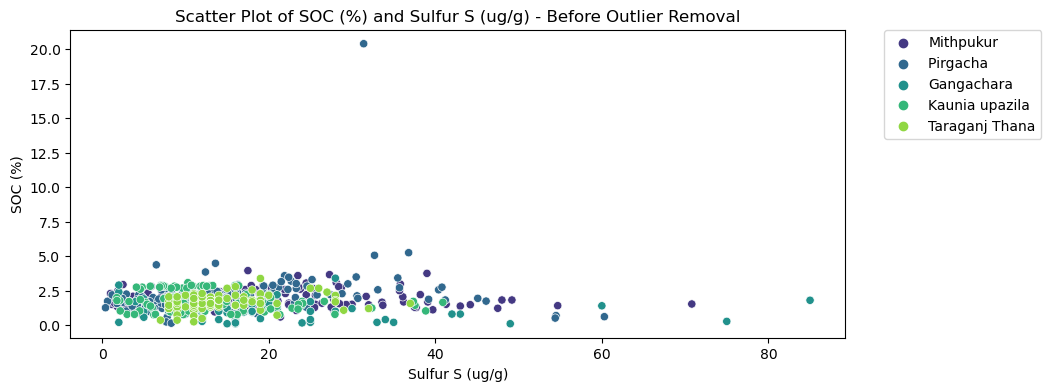

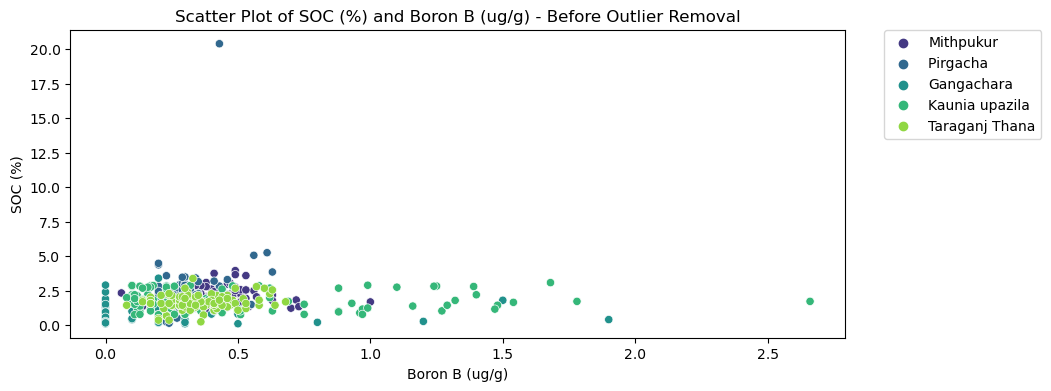

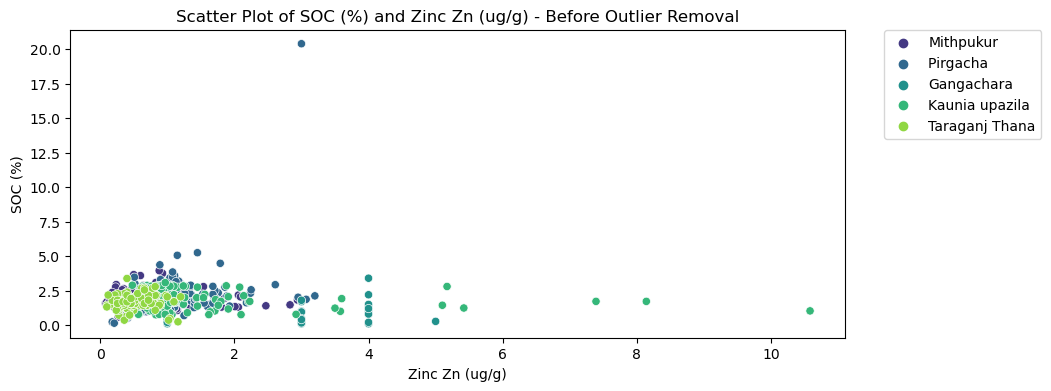

In [54]:
# Before Outlier Removal

import matplotlib.ticker as ticker

x_variables = ['pH', 'Nitrogen N (%)', 'Potassium K (meq/100)',
            'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)',
            'Zinc Zn (ug/g)']

for x_var in x_variables:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df, x=x_var, y='SOC (%)', hue='Area', palette='viridis')
    
    plt.title(f'Scatter Plot of SOC (%) and {x_var} - Before Outlier Removal')
    plt.xlabel(x_var)
    plt.ylabel('SOC (%)')
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


**Handling Outliers**

In [55]:
# Calculate the first and third quartile for numerical data
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Create a filter to keep only non-outliers
non_outliers_filter = ~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the filter to your dataframe
df_no_outliers = df[non_outliers_filter]

# Print the number of rows remaining
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

Number of rows after removing outliers: 409


In [56]:
print(df.shape)
print(df_no_outliers.shape)

(618, 13)
(409, 13)


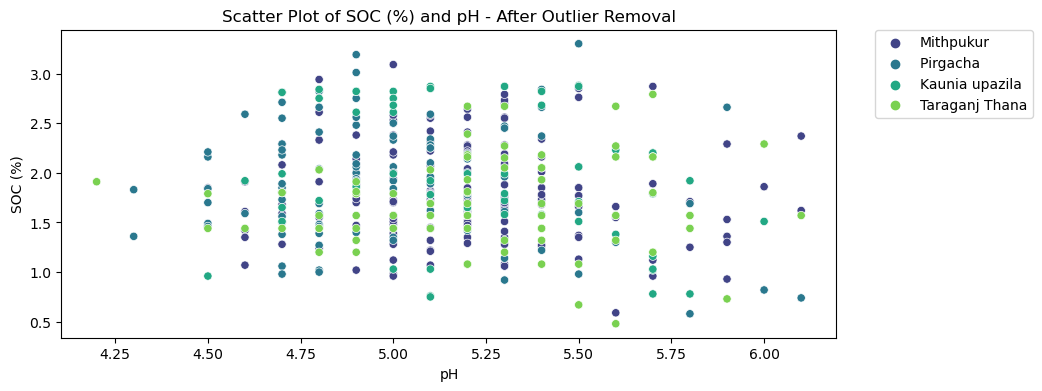

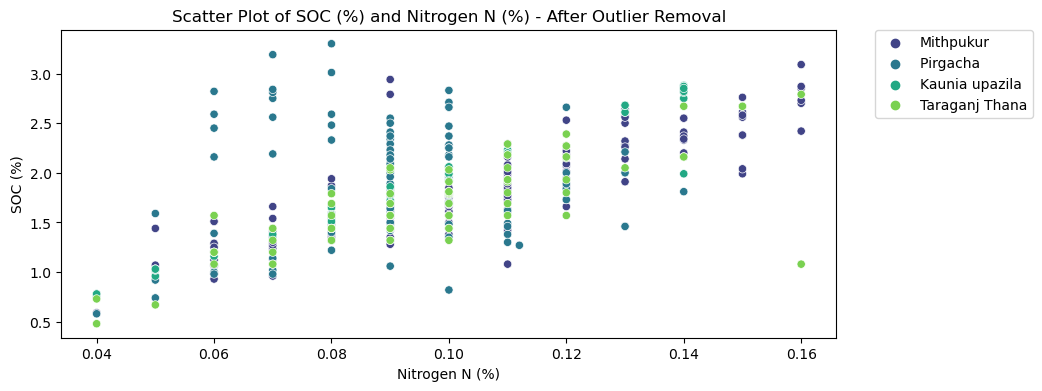

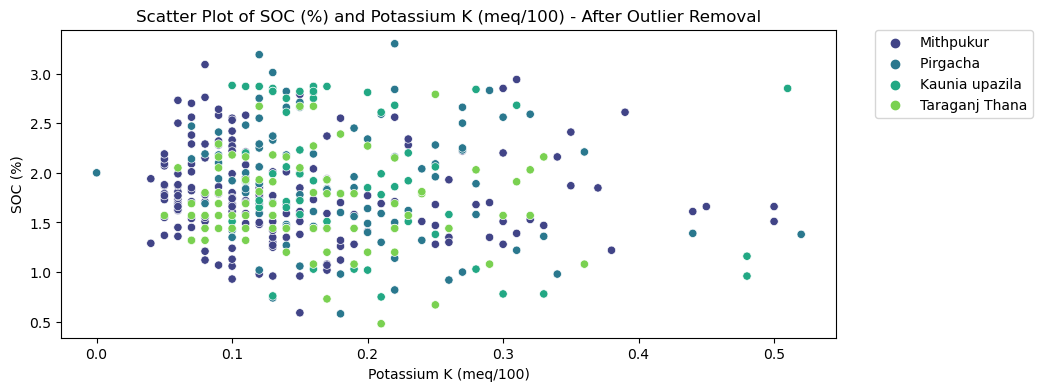

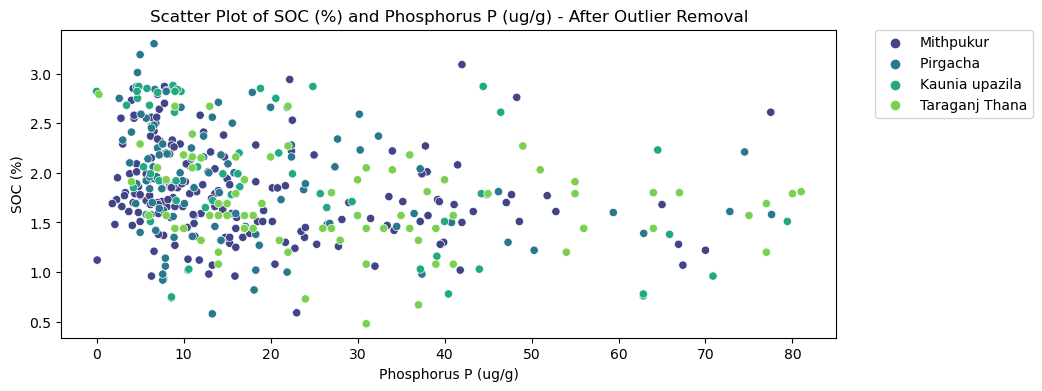

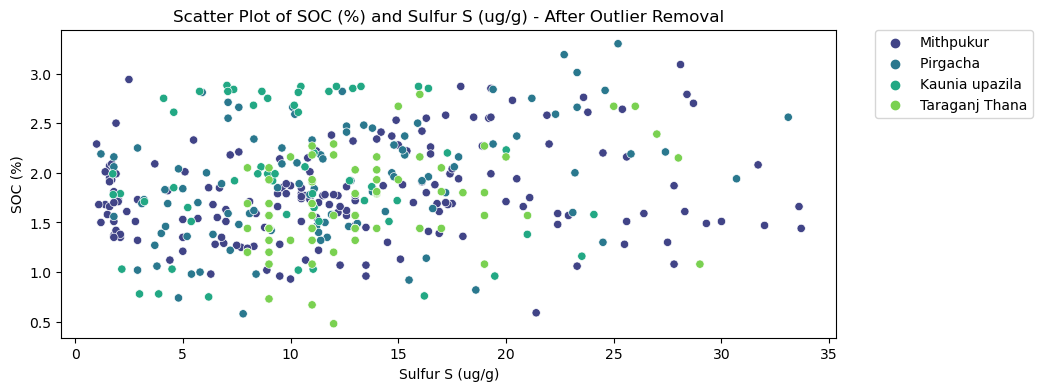

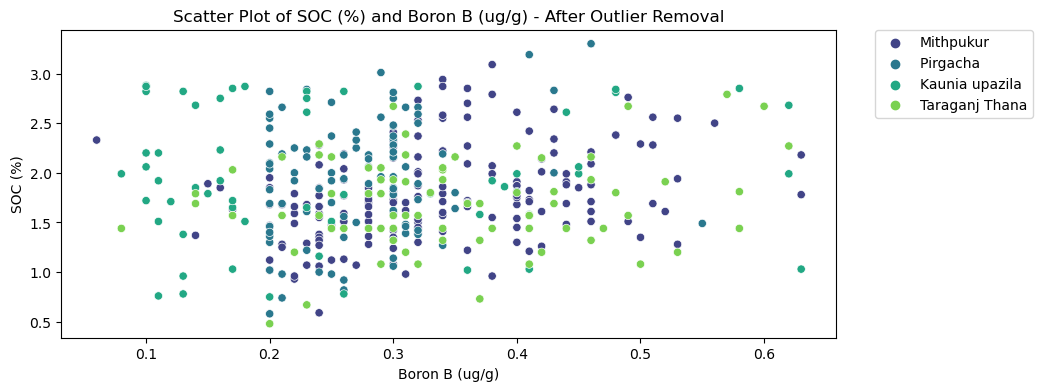

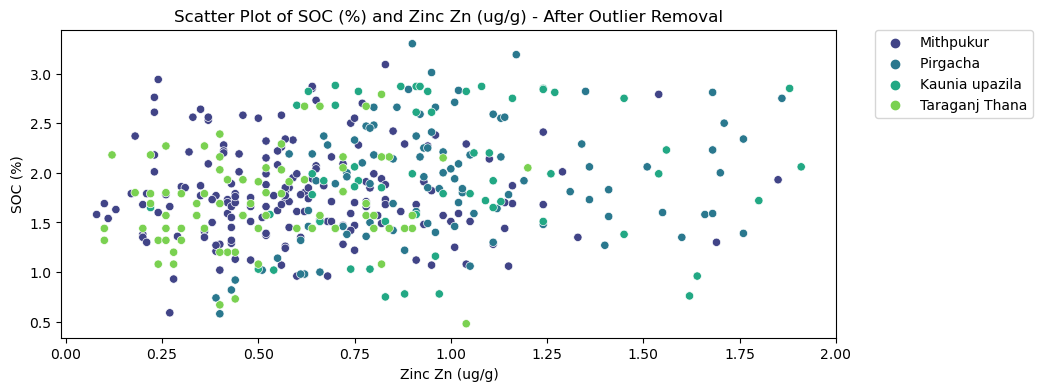

In [57]:
# After Outlier Removal

import matplotlib.ticker as ticker

x_variables = ['pH', 'Nitrogen N (%)', 'Potassium K (meq/100)',
            'Phosphorus P (ug/g)', 'Sulfur S (ug/g)', 'Boron B (ug/g)',
            'Zinc Zn (ug/g)']

for x_var in x_variables:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df_no_outliers, x=x_var, y='SOC (%)', hue='Area', palette='viridis')
    
    plt.title(f'Scatter Plot of SOC (%) and {x_var} - After Outlier Removal')
    plt.xlabel(x_var)
    plt.ylabel('SOC (%)')
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()